# Objective: Feature Engineering

Load tables and merge them together into one big table. Will then add new features to this.

In [2]:
cd instacart-market-basket-analysis/

[WinError 2] The system cannot find the file specified: 'instacart-market-basket-analysis/'
C:\Users\mindy\Downloads\instacart-market-basket-analysis


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cd instacart-market-basket-analysis/

[WinError 2] The system cannot find the file specified: 'instacart-market-basket-analysis/'
C:\Users\mindy\Downloads\instacart-market-basket-analysis


In [5]:
aisles = pd.read_csv('aisles.csv')

In [6]:
departments = pd.read_csv('departments.csv')

In [7]:
order_products__prior = pd.read_csv('order_products__prior.csv')

In [8]:
order_products__train = pd.read_csv('order_products__train.csv')

In [9]:
orders = pd.read_csv('orders.csv')

In [10]:
products = pd.read_csv('products.csv')

In [11]:
order_products__prior_df = pd.merge(order_products__prior, products, on='product_id', how='left')
order_products__prior_df = pd.merge(order_products__prior_df, aisles, on='aisle_id', how='left')
order_products__prior_df = pd.merge(order_products__prior_df, departments, on='department_id', how='left')
order_products__prior_df = pd.merge(order_products__prior_df, orders, on='order_id', how='left')
order_products__prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In order to see which features we can transform to make better features for prediction, we need to see which columns are numerical.

In [12]:
order_products__prior_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
product_name              object
aisle_id                  int64
department_id             int64
aisle                     object
department                object
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(10), object(4)
memory usage: 3.9+ GB


When thinking about reordering/purchasing something again, need to consider what would be part of that decision. What would matter most and how can that factor be represented by data table given. Also, features chosen would be in light of what EDA showed. For example, when looking at data, where was there a huge **bias towards reorders**? This would shed light on what features contribute to reorders.

Below are candidate features whose contribution to reorder target value will be calculated using correlation coefficient.

Based on looking at EDA, add_to_cart_order, aisle_id, order_hour_of_day are the biggest contributors to reorder. Let us see what correlation_coefficient calculation says about that.

In [13]:
#Extract from main table numerical data only (no strings/object-type data)
order_products__prior_df_mod = order_products__prior_df.drop(['product_name', 'aisle', 'department', 'eval_set'], axis=1)
order_products__prior_df_mod.head()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,86,16,202279,3,5,9,8.0
1,2,28985,2,1,83,4,202279,3,5,9,8.0
2,2,9327,3,0,104,13,202279,3,5,9,8.0
3,2,45918,4,1,19,13,202279,3,5,9,8.0
4,2,30035,5,0,17,13,202279,3,5,9,8.0


In [14]:
order_products__prior_df_mod.corr()['reordered'].sort_values()

add_to_cart_order        -0.133024
days_since_prior_order   -0.132814
department_id            -0.039371
order_hour_of_day        -0.023300
order_dow                -0.006949
user_id                  -0.000862
order_id                 -0.000253
product_id                0.003718
aisle_id                  0.003924
order_number              0.306840
reordered                 1.000000
Name: reordered, dtype: float64

Correlation better depicted with heatmap.

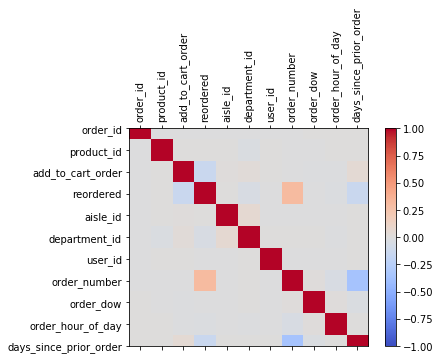

In [15]:
corr = order_products__prior_df_mod.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(order_products__prior_df_mod.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(order_products__prior_df_mod.columns)
ax.set_yticklabels(order_products__prior_df_mod.columns)
plt.show()

Correlation coefficient output is not in line with what was drawn from EDA though aisle_id was somewhat agreed upon. Best now to do some feature engineering and see if any features are closer to 1.0 than in raw data.